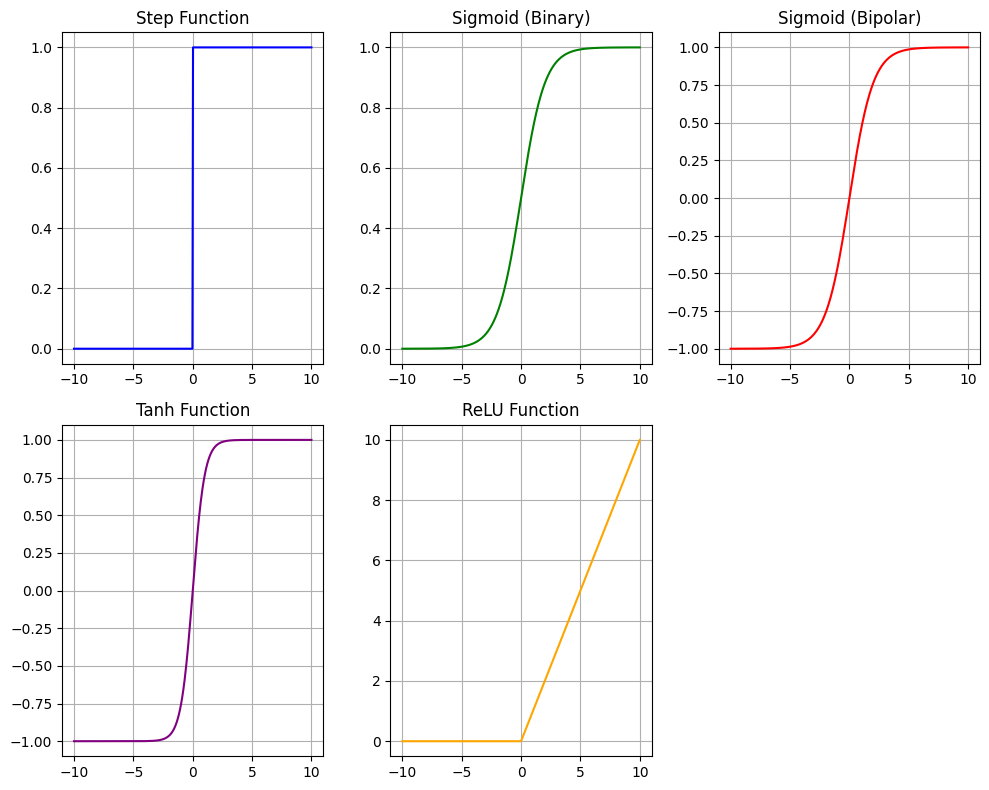

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_bipolar(x):
    return 2 / (1 + np.exp(-x)) - 1

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return np.maximum(0, x)

# Generate input values
x = np.linspace(-10, 10, 400)

# Compute activation outputs
step_values = step_function(x)
sigmoid_binary_values = sigmoid_binary(x)
sigmoid_bipolar_values = sigmoid_bipolar(x)
tanh_values = tanh_function(x)
relu_values = relu_function(x)

# Plot the activation functions
plt.figure(figsize=(10, 8))

# Step Function
plt.subplot(2, 3, 1)
plt.plot(x, step_values, label="Step Function", color="blue")
plt.title("Step Function")
plt.grid(True)

# Sigmoid Binary Function
plt.subplot(2, 3, 2)
plt.plot(x, sigmoid_binary_values, label="Sigmoid (Binary)", color="green")
plt.title("Sigmoid (Binary)")
plt.grid(True)

# Sigmoid Bipolar Function
plt.subplot(2, 3, 3)
plt.plot(x, sigmoid_bipolar_values, label="Sigmoid (Bipolar)", color="red")
plt.title("Sigmoid (Bipolar)")
plt.grid(True)

# Tanh Function
plt.subplot(2, 3, 4)
plt.plot(x, tanh_values, label="Tanh Function", color="purple")
plt.title("Tanh Function")
plt.grid(True)

# ReLU Function
plt.subplot(2, 3, 5)
plt.plot(x, relu_values, label="ReLU Function", color="orange")
plt.title("ReLU Function")
plt.grid(True)

plt.tight_layout()
plt.show()


Step Function:

  Description: Outputs 1 if the input is greater than or equal to 0; otherwise, it outputs 0.

    Equation: f(x)={1if x≥00if x<0f(x)={10​if x≥0if x<0​

Sigmoid Binary Function:

  Description: Produces an output between 0 and 1, mapping any real-valued number into this range.

    Equation: f(x)=11+e−xf(x)=1+e−x1​

Sigmoid Bipolar Function:

  Description: Produces an output between -1 and 1, mapping any real-valued number into this range.
  
    Equation: f(x)=21+e−x−1f(x)=1+e−x2​−1

Tanh Function:

  Description: Outputs values between -1 and 1, providing a scaled version of the sigmoid function.
  
    Equation: f(x)=tanh⁡(x)f(x)=tanh(x)

ReLU Function:

  Description: Outputs the input directly if it is positive; otherwise, it outputs 0.
  
    Equation: f(x)=max⁡(0,x)f(x)=max(0,x)

Task 2:
Implement a Simple Neural Network:

• Create a simple neural network with one hidden layer using each activation
function (sigmoid, tanh, and ReLU).

• Train the network on a binary classification task (e.g., XOR problem) using a
small dataset.

• Compare the performance of the neural network with different activation
functions.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# For binary classification, select two classes: 'setosa' (0) and 'versicolor' (1)
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create a neural network model with a specified activation function
def create_model(activation):
    model = Sequential()
    model.add(Dense(4, input_shape=(4,), activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    return model

# List of activation functions to compare
activations = ['sigmoid', 'tanh', 'relu']

# Train and evaluate models with different activation functions
for activation in activations:
    model = create_model(activation)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Activation Function: {activation}, Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation Function: sigmoid, Accuracy: 1.0000
Activation Function: tanh, Accuracy: 1.0000
Activation Function: relu, Accuracy: 1.0000


Interpretation :
The program builds a neural network to classify two types of flowers from the Iris dataset. It tests three activation functions: sigmoid, tanh, and ReLU. All three models achieved perfect accuracy (100%) on the test data. This means they correctly identified every test flower without any mistakes. However, perfect accuracy might indicate that the models could be overfitting, meaning they might not work as well on new data. More testing with different datasets and settings could help ensure the models are reliable.